In this article, I will analyze some advertising campaign engagement data from Facebook. Each row is an ad that ran on the platform. It includes the amount spent on the campaign, and other outcome/engagement data. The goal was to do some basic regression analyses and tease out some insights.

For that we need to first mount google drive to get the Travel Pony data. If you do not know how to mount google drive in your google collab the below collab will be helpful. 

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/My Drive/Academics/Sem 3/DAD/Travel Pony Facebook.csv')

1. Creating a cost per impressions column. Cost per impressions = Amount Spend / Impressions. This helps in figuring out what day of the week works best? (What day is it cheapest to generate impressions)
What day works worst? (What day is most expensive)

In [0]:
df ['Cost per Impressions'] = df['Amount Spent (USD)']/df['Impressions']
print (df ['Cost per Impressions'])

0       0.000466
1       0.000652
2       0.000448
3       0.000452
4       0.002464
          ...   
3700    0.003512
3701    0.002936
3702    0.008919
3703    0.006643
3704    0.000439
Name: Cost per Impressions, Length: 3705, dtype: float64


1a) Finding the best days and worst days fo impressions. This is done by figuring out which days are the most expensive and which days are the cheapest to generate impressions. 

In [0]:
# Installing Arrow 
!pip install arrow


In [0]:
import arrow

# A function to return iso_weekday for a given "Start Date" as string
def get_iso_weekday(start_date):
  dt = arrow.get(start_date, 'YYYY-MM-DD')
  return dt.isoweekday()

# This example below shows how to convert StartDate of type String to an Arrow
# which then can be used for aggregation
# print(start_date_df_as_string[0])
# print(get_iso_weekday(start_date_df_as_string[0]))

# Creating a new column with Start Date as Datetime
start_date_series = df["Start Date"]
iso_weekday_series = start_date_series.apply(get_iso_weekday)
df["ISO Weekday"] = iso_weekday_series
#print(df)
print("unique ISO weekdays", df["ISO Weekday"].unique())






unique ISO weekdays [1 7 6 5 4 3 2]


In [0]:
# Finding the mean for Cost per imporession for all days of week
cost_per_impression_by_weekday_df = df.groupby('ISO Weekday')['Cost per Impressions'].mean()
print(cost_per_impression_by_weekday_df)
print("Day of the week with lowest cost per impression:", cost_per_impression_by_weekday_df.idxmin())
print("Day of the week with highest cost per impression:", cost_per_impression_by_weekday_df.idxmax())



ISO Weekday
1    0.002910
2    0.003040
3    0.002981
4    0.003398
5    0.004097
6    0.002629
7    0.003688
Name: Cost per Impressions, dtype: float64
Day of the week with lowest cost per imporession: 6
Day of the week with highest cost per imporession: 5


Therefore, Friday is the most expensive and Saturday is the cheapest. 

2. Computing correlation between amount spent and other variables like 
- Reach
- Frequency
- Unique Clicks
- Page Likes

Correlation = Is a measure of how things are related. 

In [0]:
# learning correlation from https://pythonprogramming.net/pandas-saving-reading-csv-file/
# print(df.describe())
# print(df.corr())
print(df[['Amount Spent (USD)','Reach', 'Frequency', 'Unique Clicks', 'Page Likes']].corr())

                    Amount Spent (USD)     Reach  ...  Unique Clicks  Page Likes
Amount Spent (USD)            1.000000  0.703124  ...       0.882993    0.757612
Reach                         0.703124  1.000000  ...       0.722249    0.304388
Frequency                     0.130201  0.334101  ...       0.135103    0.000182
Unique Clicks                 0.882993  0.722249  ...       1.000000    0.584614
Page Likes                    0.757612  0.304388  ...       0.584614    1.000000

[5 rows x 5 columns]


The strongest correlation is between Amount Spent and Unique clicks with a coefficient of 0.883. This means that the ad spend has the most effect in the total different individuals who see and click your ad. This shows that the more money we spend, the more we reach out to different people which is good thing. 

3. Computing regression analysis between Unique Clicks (which is the dependent variable) and Reach and Frequency (which are the independent variables).

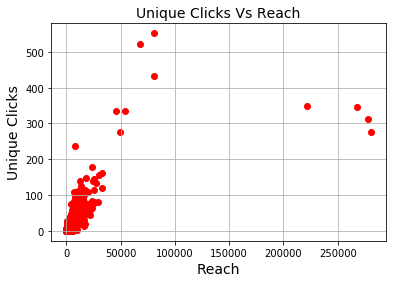

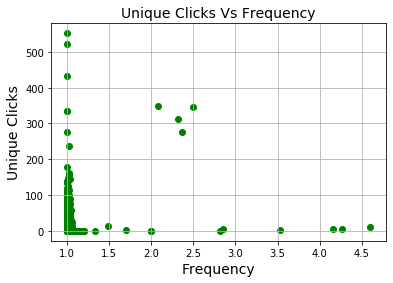

In [0]:
from pandas import DataFrame
import matplotlib.pyplot as plt


plt.scatter(df['Reach'], df['Unique Clicks'], color='red')
plt.title('Unique Clicks Vs Reach', fontsize=14)
plt.xlabel('Reach', fontsize=14)
plt.ylabel('Unique Clicks', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Frequency'], df['Unique Clicks'], color='green')
plt.title('Unique Clicks Vs Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Unique Clicks', fontsize=14)
plt.grid(True)
plt.show()


In [0]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
X = df[['Reach','Frequency']] 
Y = df['Unique Clicks']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

# y = m1*x1 + m2*x2 + b
# unique_click = reach * (0.00206) + frequency * (-25.06) + 29.227



Intercept: 
 29.227730390224757
Coefficients: 
 [ 2.06474936e-03 -2.50632823e+01]
                            OLS Regression Results                            
Dep. Variable:          Unique Clicks   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2124.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        06:22:30   Log-Likelihood:                -15907.
No. Observations:                3705   AIC:                         3.182e+04
Df Residuals:                    3702   BIC:                         3.184e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The variable that strongly predicts unique click is frequency. If frequency is very high, then the unique clicks reduce . 